# **IMO 1 EXAM 1**

Ana Milena Forero Pinto

In [ ]:
from google.colab import files
from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **Question 2**

$$\frac{d C(t)}{dt} = \beta C(t)$$

$$C(0) = 1$$

$$\beta = ln(2)$$

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import scipy.optimize

In [ ]:
def exp_growth(y, t):
    C = y
    beta = np.log(2) #Growth rate
    dydt = beta*C
    return dydt

In [ ]:
y0 = 1 #Initial condition
t = np.linspace(0, 13.5, 41) #time
#Solvig the ODE:
solution = odeint(exp_growth, y0, t)

In [ ]:

#Fitting 
solution = solution.T
solution = solution[0, :]

def monoExp(t, m, x, b):
    return m * np.exp(x * t) + b

# perform the fit
params, cv = scipy.optimize.curve_fit(monoExp, t, solution)
m, x, b = params

# determine quality of the fit
squaredDiffs = np.square(solution - monoExp(t, m, x, b))
squaredDiffsFromMean = np.square(solution - np.mean(solution))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")
# inspect the parameters
print(f"Y = {m} * e^({x} * t) + {b}")


R² = 1.0
Y = 0.999999994502137 * e^(0.6931471935036752 * t) + -2.41157767077773e-07


### Plots

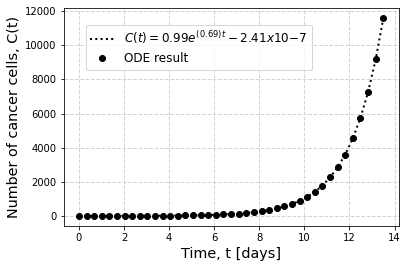

In [ ]:
y= m * np.exp(x * t) + b

fig, ax = plt.subplots()
ax.grid(color='#D3D3D3', linestyle='--', linewidth=1)

ax.plot(t, y, color = 'black', linestyle = ':', linewidth = 2, label = r'$C(t) = 0.99 e^{(0.69) t} -2.41x10{-7}$')
ax.plot(t, solution, color = 'black', linestyle = '',  marker='o', label = 'ODE result')


ax.set_xlabel('Time, t [days]', size = 'x-large')
ax.set_ylabel('Number of cancer cells, C(t)', size = 'x-large')
plt.legend(bbox_to_anchor=(0.76, 0.82), loc='center right', fontsize=12)
#plt.title('Tumor Growth',  size ='x-large', pad = 15)
#images_dir = '/content/gdrive/My Drive/'
#plt.savefig(f"{images_dir}/TumorGrowth.pdf", bbox_to_anchor=(1.04,0.5), bbox_inches='tight', dpi = 300)

## **Question 3**

### **ABM rules:**
  

*   **Cell intrinsic:** 

1.   All agents have the same cycle speed at every time (even after division). So, each time step (1 day, cell cycle speed) all agents try to divide, duplicate.
2.   No agents die.

*   **Cell extrinsic:** 
1.   If the number of neighbors is less than 8, the cell can divide. A new cell is placed on an unoccupied grid in the neighborhood. 
2.   If the number of neighbors is equal to 8, the cell doesn't divide as if by contact inhibition.

**Moore neighborhood:**
Neighbors of $ij$ ($i$=row,$j$=column) are:

*   $(i-1,j):$ Up
*   $(i+1,j):$ Down
*   $(i,j+1):$ Right
*   $(i,j-1):$ Left
*   $(i-1,j+1):$ Upper right (Diagonal)
*   $(i+1,j+1):$ Lower right (Diagonal)
*   $(i-1,j-1):$ Upper left (Diagonal)
*   $(i+1,j-1):$ Lower left (Diagonal)


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import colors

In [ ]:
def find_neighbors(i,j):
    cell_neigh = [[i+1,j],[i-1,j],[i,j+1],[i,j-1],[i-1,j+1],[i+1,j+1],[i-1,j-1],[i+1,j-1]]
    #cell_neigh = [[i+1,j],[i-1,j],[i,j+1],[i,j-1]]
    #random.shuffle(cell_neigh)
    return cell_neigh

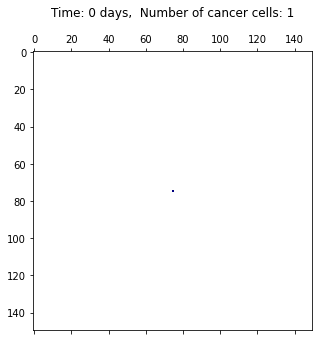


 -------------------------------------------- 



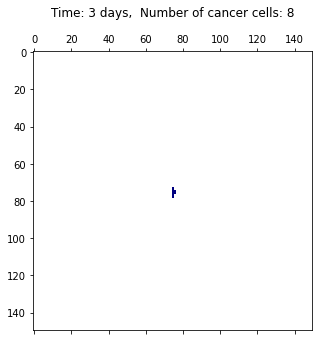


 -------------------------------------------- 



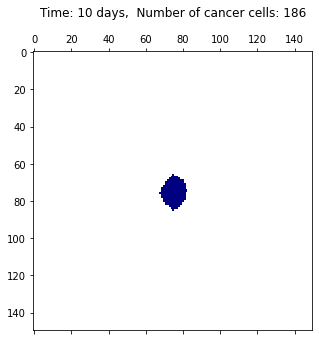


 -------------------------------------------- 



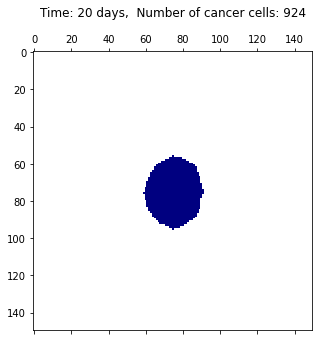


 -------------------------------------------- 



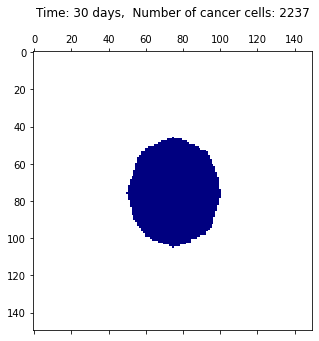


 -------------------------------------------- 



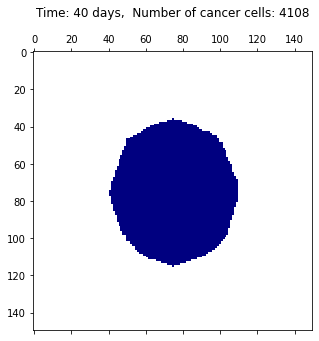


 -------------------------------------------- 



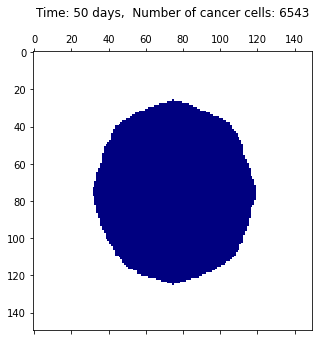


 -------------------------------------------- 


 -------------------------------------------- 



In [ ]:
#Create array. Domain size is imax x jmax
imax = 150
jmax = 150
env = np.zeros((imax,jmax), dtype=int) 
#Locate initial cell
env[75,75] = 1
#Store initial state
initial_env = env
#List to store number of cells during timr
Number_of_cells = []
t = [*range(1,60)] #time in days from day 1

#Plot
inn = 0
n_initialcells = np.sum(env) 
cmap = colors.ListedColormap(['white', 'navy'])
fig, ax = plt.subplots(figsize=(5, 6))
ax.matshow(initial_env, cmap=cmap)
ax.set_title("Time: 0 days," + "  Number of cancer cells: %1.0f"%n_initialcells + "\n")
plt.show()
print("\n -------------------------------------------- \n")



#Iterate over time
for Time in t:

    #Extract cells' index for the state at a certain time
    cells_index = np.argwhere(env == 1)
    cells_index_temp = cells_index.tolist()
    #Loop over each cell
    for cell in range(np.sum(env)): 
        picked_cell = random.sample(cells_index_temp,1)[0]
        #Extract cell's index
        i = picked_cell[0]
        j = picked_cell[1]
        #Find the neighbors of the specific cell
        neighbors = find_neighbors(i,j)
        #Loop over neighbors
        for n in neighbors:
            #Extract neighbor's index
            n_row = n[0]
            n_column = n[1]
            #If index get out of the domain size, continue
            if n_row >= imax or n_column >= jmax: continue
            #When index are inside the domain, cell may be able to divide or not.
            elif env[n_row, n_column] == 0:
                env[n_row, n_column] = 1
                break;
        #end for
        cells_index_temp.remove(picked_cell)


    count_cells = np.sum(env)
    Number_of_cells.append(count_cells)
    inn += 1
    #Plot
    if inn%10 == 0 or inn == 3 or inn ==58:
      fig, ax = plt.subplots(figsize=(5, 6))
      ax.set_title("Time: %1.0f days" %Time + ",  Number of cancer cells: %1.0f"%count_cells + "\n")
      ax.matshow(env, cmap=cmap)
      plt.show()
      print("\n -------------------------------------------- \n")

#Including the initial conditions
t.insert(0, 0)
Number_of_cells.insert(0,n_initialcells)

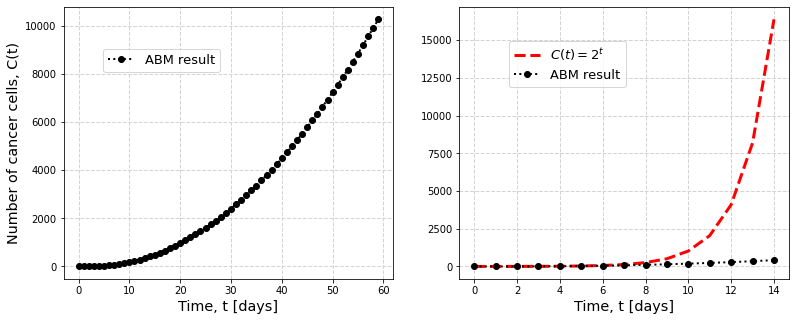

In [ ]:
T = np.array(range(15))
y = 2**T
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.grid(color='#D3D3D3', linestyle='--', linewidth=1)
ax2.grid(color='#D3D3D3', linestyle='--', linewidth=1)

ax1.plot(t, Number_of_cells, color = 'black', linestyle = ':',  marker='o', linewidth = 2, label = 'ABM result')

ax2.plot(T, y, color = 'red', linestyle = '--', linewidth = 3, label = r'$C(t) = 2^{t}}$')
ax2.plot(t[0:15], Number_of_cells[0:15], color = 'black', linestyle = ':',  marker='o',linewidth = 2, label = 'ABM result')


ax1.set_xlabel('Time, t [days]', size = 'x-large')
ax1.set_ylabel('Number of cancer cells, C(t)', size = 'x-large')
ax2.set_xlabel('Time, t [days]', size = 'x-large')
ax1.legend(bbox_to_anchor=(0.1, 0.87), loc='upper left', fontsize=13)
ax2.legend(bbox_to_anchor=(0.13, 0.9),loc='upper left', fontsize=13)

#plt.title('Tumor Growth',  size ='x-large', pad = 15)
#images_dir = '/content/gdrive/My Drive/'
#plt.savefig(f"{images_dir}/TumorGrowth_ABM.pdf", bbox_to_anchor=(1.04,0.5), bbox_inches='tight', dpi = 300)